In [41]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import os

def calculate_distance_from_point_to_station(row):
    station_coord = (row['LATITUDE:'], row['LONGITUDE:'])
    given_point_coord = (-15.765885, -47.871837)
    return geodesic(station_coord, given_point_coord).kilometers

df_all_stations = pd.read_csv("../data/all_stations.csv", decimal=",", sep=";")

df_all_stations["Distancia"] = df_all_stations.apply(calculate_distance_from_point_to_station, axis=1) 

df_nearest_stations = df_all_stations[(df_all_stations["Distancia"] > 35) & (df_all_stations["Distancia"] < 50)] 

print(df_nearest_stations)

  REGI?O: UF:            ESTAC?O: CODIGO (WMO):   LATITUDE:  LONGITUDE:  \
2      CO  DF  PARANOA (COOPA-DF)          A047  -16.012222  -47.557417   

  ALTITUDE:                                            Arquivo  Distancia  
2    1043.0  INMET_CO_DF_A047_PARANOA (COOPA-DF)_01-01-2019...  43.322909  


In [42]:
yeardirectoryfilename = []
df_nearest_stations_weather_data = []

for filename in df_nearest_stations['Arquivo']: 
    yeardirectoryfilename.append(filename)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_nearest_stations_weather_data.append(df_weather_data)

df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)


df_compilation_of_nearest_stations_weather_data

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
0,2019/01/01,0000 UTC,0.8,899.2,899.2,898.6,NaN,19.3,18.1,19.4,19.2,18.4,18.0,94.0,92.0,93.0,344.0,3.7,1.6,NaN
1,2019/01/01,0100 UTC,1.8,900.0,900.0,899.2,NaN,19.1,18.2,19.3,19.1,18.3,18.0,95.0,92.0,94.0,275.0,3.4,0.9,NaN
2,2019/01/01,0200 UTC,0.0,900.3,900.4,900.0,NaN,18.9,18.4,19.2,18.8,18.5,18.1,97.0,94.0,97.0,237.0,2.2,0.4,NaN
3,2019/01/01,0300 UTC,0.0,899.4,900.3,899.4,NaN,18.9,17.8,19.0,18.8,18.4,17.8,97.0,93.0,93.0,356.0,3.5,1.5,NaN
4,2019/01/01,0400 UTC,0.0,898.9,899.5,898.9,NaN,18.6,18.3,19.0,18.6,18.3,17.7,98.0,93.0,98.0,54.0,3.0,1.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023/12/31,1900 UTC,0.0,896.0,897.3,896.0,NaN,26.6,20.1,27.3,26.0,21.1,19.7,73.0,65.0,68.0,33.0,7.5,2.9,2412.1
52580,2023/12/31,2000 UTC,0.0,895.5,896.0,895.5,NaN,26.1,20.4,27.7,26.1,21.3,19.8,71.0,63.0,71.0,64.0,5.6,2.8,1644.0
52581,2023/12/31,2100 UTC,0.0,895.3,895.5,895.3,NaN,25.3,20.8,26.2,25.3,21.0,20.3,77.0,70.0,76.0,55.0,4.8,1.8,474.1
52582,2023/12/31,2200 UTC,0.0,896.4,896.4,895.3,NaN,24.0,20.9,25.3,24.0,21.0,20.7,83.0,76.0,83.0,62.0,2.8,0.7,58.3


<class 'pandas.core.frame.DataFrame'>
Index: 52584 entries, 0 to 52583
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   52584 non-null  datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       51146 non-null  float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  51149 non-null  float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        51133 non-null  float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       51133 non-null  float64       
 5   RADIACAO GLOBAL (KJ/m²)                                4676 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           51154 non-null  float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   50655 non-null  f

/tmp/ipykernel_439988/1973960381.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avarage_temperature_by_month = df_sorted.resample("M").mean()


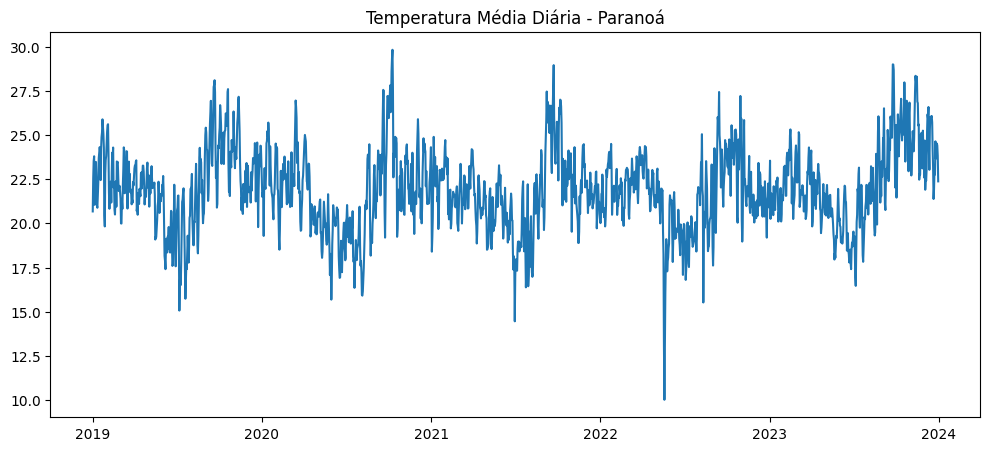

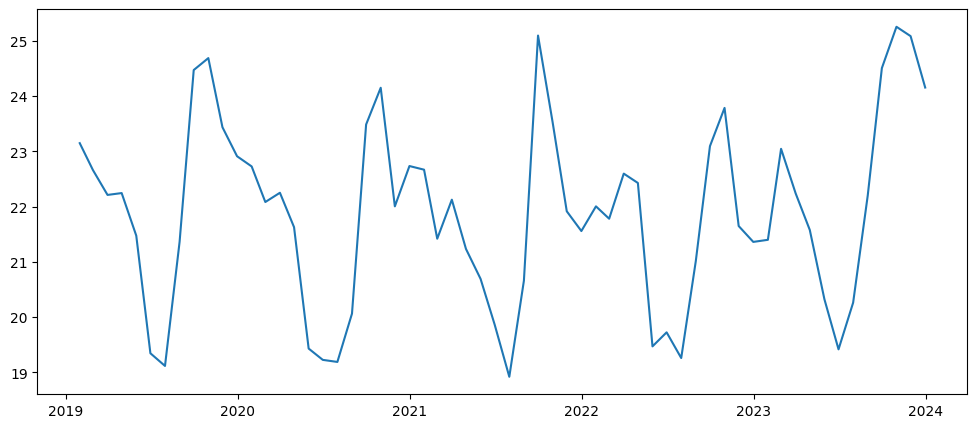

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            0
RADIACAO GLOBAL (KJ/m²)                                  1461
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                0
TEMPERATURA DO PONTO DE ORVALHO (°C)                        0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                    0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                    0
UMIDADE RELATIVA DO AR, HORARIA (%)                         0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                        0
VENTO, RAJADA MAXIMA (m/s)                                  0
VENTO, V

In [43]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

df_cleaned = df_compilation_of_nearest_stations_weather_data.drop(columns=['Hora UTC'])

df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

df_sorted = df_cleaned.sort_values(by='Data', ascending=True)

df_sorted.info()

forecast_parameter = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

# print(df_notimecollumn.info())
# print(df_notimecollumn.info())
#print(df_notimecollumn.groupby(['Data'], as_index= True).mean())

print(df_sorted.info())

#Converte Data
#df_notimecollumn['Data']=pd.to_datetime(df_notimecollumn['Data'])
df_sorted.set_index('Data', inplace=True)
df_avarage_temperature_by_day = df_sorted.resample("D").mean()
df_avarage_temperature_by_month = df_sorted.resample("M").mean()

print(df_avarage_temperature_by_day)

#Teste
plt.figure(figsize=(12, 5))
plt.title("Temperatura Média Diária - Paranoá")
plt.plot(df_avarage_temperature_by_day[forecast_parameter], label='Previsão')
plt.show()
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_month[forecast_parameter], label='Previsão')
plt.show()

# Verificar se há valores nulos
print(df_avarage_temperature_by_day.isnull().sum())

# Tratar valores nulos
df_not_null_values_day = df_avarage_temperature_by_day.ffill()
df_not_null_values_month = df_avarage_temperature_by_month.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data = int(len(df_not_null_values_day) * 0.8)
df_training, df_test = df_not_null_values_day[:df_splited_data], df_not_null_values_day[df_splited_data:]  

# Divisão dos dados em treinamento (80%) e teste (20%)- MONTHLY
df_splited_data_month = int(len(df_not_null_values_month) * 0.8)
df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  